<a href="https://colab.research.google.com/github/Sancharidey123/Spam_Email_detection-_-/blob/main/Spam_emailDetection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
plt.style.use('ggplot')
import warnings
warnings.simplefilter('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
path="/content/drive/MyDrive/Dataset/Spam.csv"
df=pd.read_csv(path)
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.size

27860

Data Cleaning


In [ ]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will �_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5163,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
# Droping Unnamed columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.sample(4)

,v1,v2
4939,ham,�� go home liao? Ask dad to pick me up at 6...
2291,ham,Remind me how to get there and I shall do so
1345,ham,Que pases un buen tiempo or something like that
1649,ham,ITS A LAPTOP TAKE IT WITH YOU.


In [ ]:
df.rename(columns={'v1':'Target','v2':'Text'},  inplace=True)

In [ ]:
df.sample(4)

,Target,Text
864,ham,Dude ive been seeing a lotta corvettes lately
530,spam,PRIVATE! Your 2003 Account Statement for 07815...
278,ham,Just sent it. So what type of food do you like?
4190,ham,"Each Moment in a day,has its own value-Morning..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['Target'] = encoder.fit_transform(df['Target'])

In [ ]:
df.head(4)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [ ]:
#cheacking missing value
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [ ]:
df.duplicated().sum() #cheacking duplicate values

409

In [ ]:
#removed duplicate value
df = df. drop_duplicates(keep ='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5163, 2)

## EDA

In [ ]:
df.head(6)


,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...


In [ ]:
df['Target'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5163, dtype: int64>

Class distribution


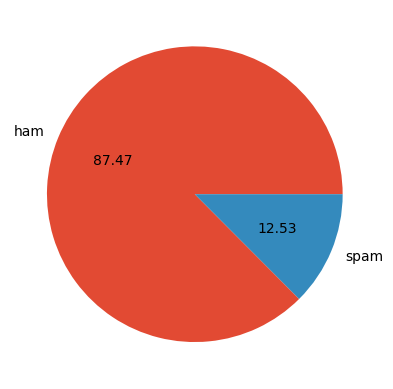

In [ ]:
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
!pip install nltk


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# see how to cal. no. of characters in sms/email
# then I store no. of character in new variable/col..

df['num_characters'] = df['Text'].apply(len)


In [ ]:
df.head(4)


,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49


In [ ]:
# now fetch no. of words
# now I will cal. length of each list
# store no. of words in new varialbe/col. num_words

df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [ ]:
df.head(4)


,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13


In [ ]:
# now fetch no. of sentences in single sms/mail
# now cal. len of each sentences
# store no. of sentence in new variable/col. num_sentences

df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [ ]:
df.head(4)

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5163.000000,5163.000000,5163.000000
mean,78.811156,18.444122,1.963974
std,58.153491,13.327940,1.448008
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


analyze ham and spam sms/mail separately

ham

In [ ]:
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.428919,17.123782,1.820195
std,56.356310,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


2.spam

In [ ]:
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,647.000000,647.000000,647.000000
mean,137.318393,27.659969,2.967543
std,30.096861,7.038065,1.490069
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

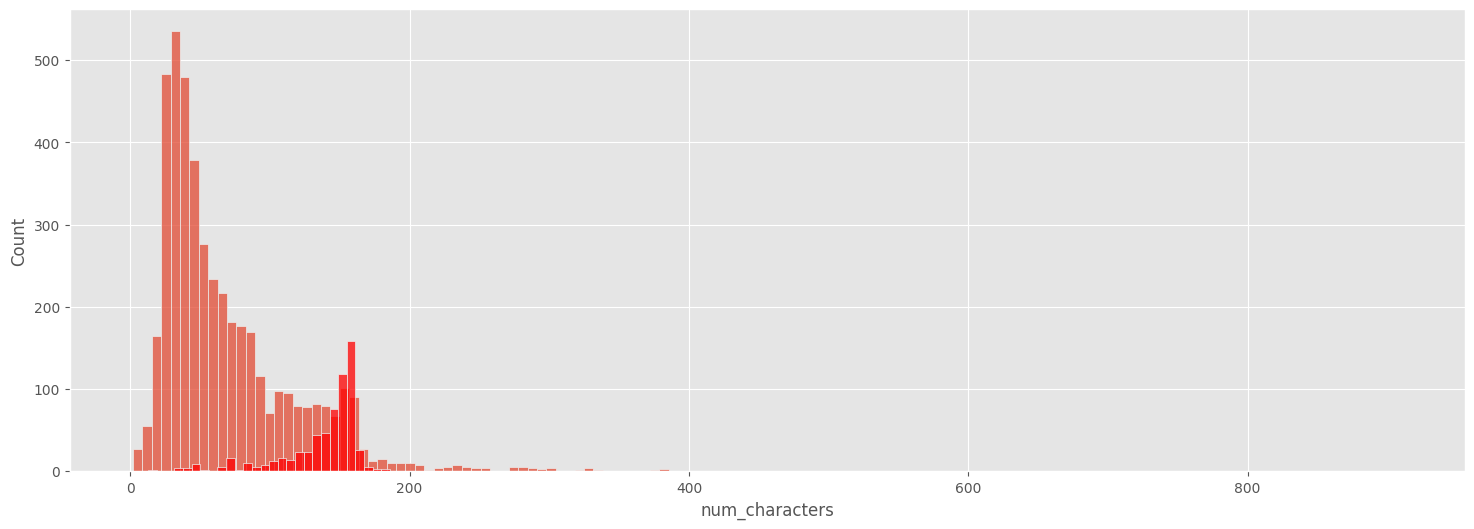

In [ ]:

plt.figure(figsize=(18,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'], color='red')


<Axes: xlabel='num_words', ylabel='Count'>

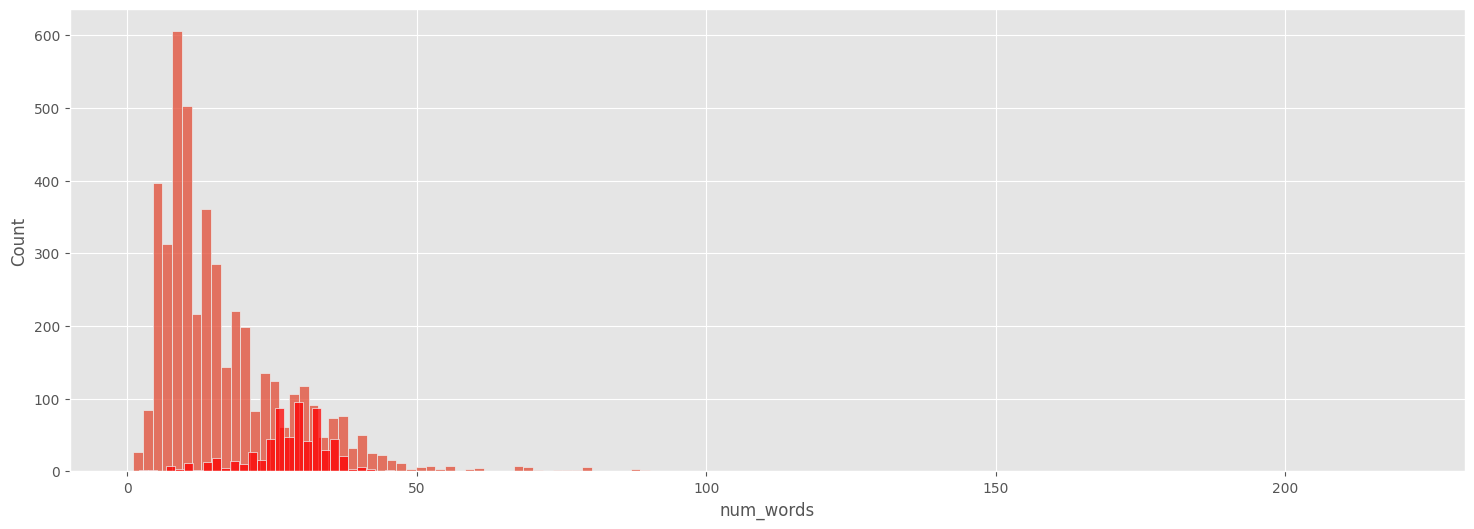

In [ ]:
plt.figure(figsize=(18,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'], color='red')


<Axes: xlabel='num_sentences', ylabel='Count'>

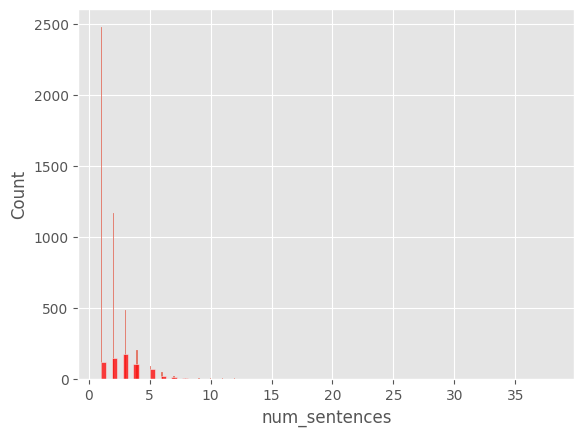

In [ ]:
sns.histplot(df[df['Target']==0]['num_sentences'])
sns.histplot(df[df['Target']==1]['num_sentences'], color='red')


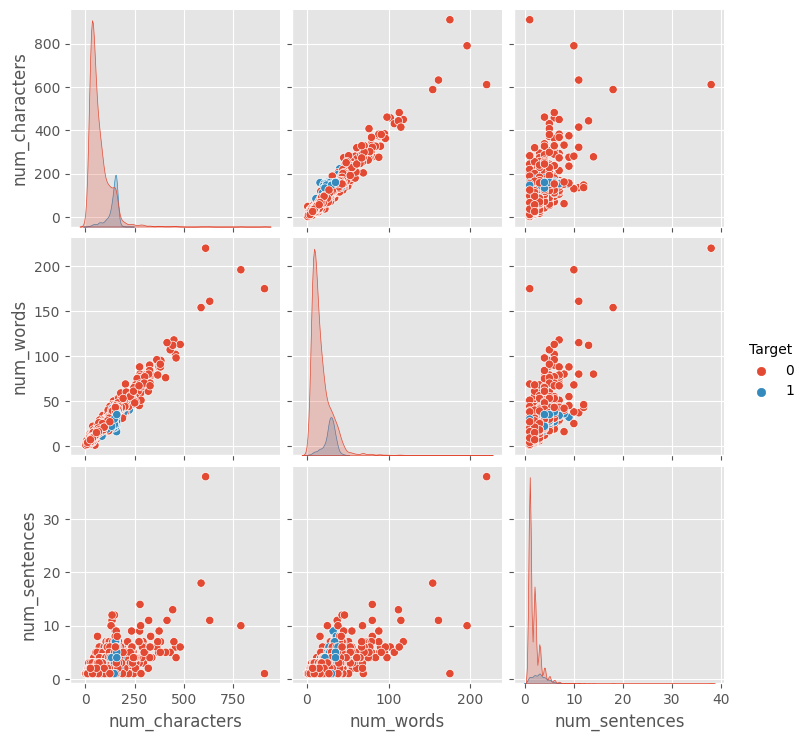

In [ ]:
sns.pairplot(df, hue='Target')


In [ ]:
df.corr()

,Target,num_characters,num_words,num_sentences
Target,1.000000,0.380847,0.261752,0.262357
num_characters,0.380847,1.000000,0.966164,0.623719
num_words,0.261752,0.966164,1.000000,0.679952
num_sentences,0.262357,0.623719,0.679952,1.000000


<Axes: >

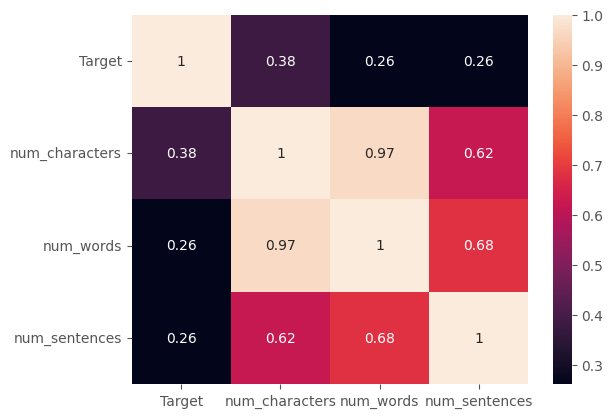

In [ ]:
sns.heatmap(df.corr(), annot=True)


LEBEL ENCODING

Label encoding is a process of converting categorical or textual data into numerical labels. In machine learning and data analysis, many algorithms require numerical inputs, and label encoding provides a way to represent categorical data in a format that can be easily understood by these algorithms.


In [ ]:
x=df['Text']
y=df['Target']

In [ ]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5163, dtype: object


In [ ]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5163, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)  #splitting data into train and test

In [ ]:
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn import svm

In [ ]:
cv=CountVectorizer()




In [ ]:
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [ ]:
print(x_train_cv)

  (0, 4143)	1
  (0, 1109)	1
  (0, 6703)	2
  (0, 3005)	1
  (0, 6788)	1
  (0, 7352)	1
  (0, 3003)	1
  (0, 7581)	1
  (0, 6732)	1
  (0, 3705)	1
  (0, 7071)	1
  (1, 6703)	1
  (1, 7415)	1
  (1, 4290)	2
  (1, 5676)	1
  (1, 4823)	1
  (1, 2173)	1
  (1, 3302)	1
  (1, 1351)	1
  (1, 7173)	1
  (2, 2173)	1
  (2, 3152)	1
  (2, 4520)	1
  (2, 4599)	1
  (2, 2184)	1
  :	:
  (4127, 6719)	1
  (4127, 6700)	1
  (4127, 4195)	1
  (4127, 3224)	1
  (4127, 7591)	1
  (4127, 1397)	1
  (4128, 6946)	1
  (4128, 4685)	1
  (4128, 4320)	1
  (4129, 7581)	1
  (4129, 3705)	1
  (4129, 4823)	1
  (4129, 4599)	2
  (4129, 951)	1
  (4129, 3913)	1
  (4129, 4774)	1
  (4129, 4938)	1
  (4129, 5913)	1
  (4129, 7394)	1
  (4129, 1085)	1
  (4129, 2395)	1
  (4129, 776)	1
  (4129, 4494)	2
  (4129, 5504)	1
  (4129, 2268)	1


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression() #creating model

In [ ]:
lr.fit(x_train_cv,y_train)
prediction_train=lr.predict(x_train_cv)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, prediction_train)*100)

99.75786924939467


In [ ]:
prediction_test = lr.predict(x_test_cv)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction_test)*100)

97.38625363020329
